In [1]:
import numpy as np
import pandas as pd
import random
import altair as alt
from tqdm import tqdm

class Player:
    def __init__(self, id, serve_skill, skill):
        self.id = id
        self.serve_skill = serve_skill
        self.skill = skill
    
    def serve_success(self):
        return self.serve_skill > random.uniform(0, 1)
    
    def play_success(self):
        return self.skill > random.uniform(0, 1)


# returns the winning player
def play_exchange(serving_player, other_player):
    if(serving_player.serve_success() == False):
        return other_player
    while True:
        if(other_player.play_success() == False):
            return serving_player 
        if(serving_player.play_success() == False):
            return other_player


# serve changes every five rounds
def a_game(serving_player, accepting_player):
    scoreboard = [0, 0]
    win_score = 21
    while True:
        for i in range(5):
            winner = play_exchange(serving_player, accepting_player)
            scoreboard[winner.id] += 1
            if(scoreboard[winner.id] >= win_score):
                return winner.id
        serving_player, accepting_player = accepting_player, serving_player

        
# serve changes when the serving player loses
def b_game(serving_player, accepting_player):
    scoreboard = [0, 0]
    win_score = 11
    while True:
        winner = play_exchange(serving_player, accepting_player)
        if winner.id == serving_player.id:
            scoreboard[winner.id] += 1
            if(scoreboard[winner.id] >= win_score):
                return winner.id
        else:
            serving_player, accepting_player = accepting_player, serving_player
    

In [2]:
import collections

alice = Player(0, 0.4, 0.8)
bob = Player(1, 0.7, 0.6)

match_a = [a_game(alice, bob) for i in range(1000)]
match_b = [b_game(alice, bob) for i in range(1000)]

#c_a = collections.Counter(match_a)
#c_b = collections.Counter(match_b)
#print(c_a)
#print(c_b)

print(sum(match_a))
print(sum(match_b))

432
349


In [3]:
import seaborn as sns

alice_serve_skills = np.around(np.arange(0.3, 0.9, 0.01), 4)
bob_serve_skills = np.around(np.arange(0.3, 0.9, 0.01), 4)

scores_a = np.zeros((len(alice_serve_skills), len(bob_serve_skills)))
scores_b = np.zeros((len(alice_serve_skills), len(bob_serve_skills)))

for i, ask in enumerate(tqdm(alice_serve_skills)):
    for j, bsk in enumerate(bob_serve_skills):
        
        alice = Player(0, ask, 0.7)
        bob = Player(1, bsk, 0.7)
        
        match_a = [a_game(alice, bob) for i in range(100)]
        match_b = [b_game(alice, bob) for i in range(100)]
        
        scores_a[i][j] = sum(match_a)
        scores_b[i][j] = sum(match_b)

100%|██████████| 61/61 [01:15<00:00,  1.23s/it]


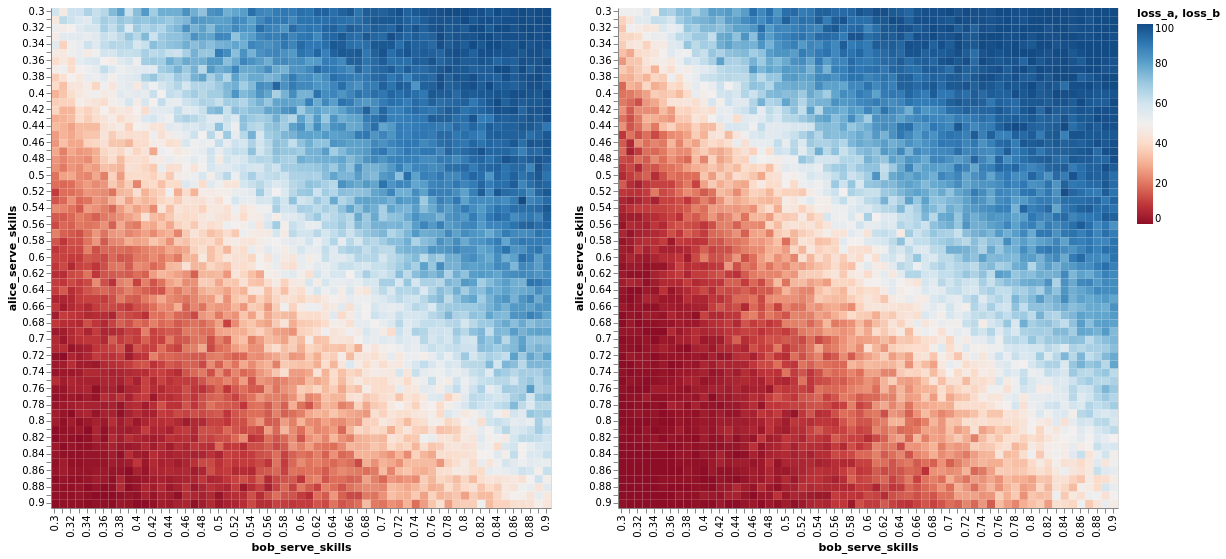

In [4]:
x, y = np.meshgrid(alice_serve_skills, bob_serve_skills)

source = pd.DataFrame({'bob_serve_skills': x.ravel(),
                     'alice_serve_skills': y.ravel(),
                     'loss_a': scores_a.ravel(),
                     'loss_b': scores_b.ravel(),
                     'diff': (scores_a - scores_b).ravel()})

base = alt.Chart(source).mark_rect().encode(
    x='bob_serve_skills:O',
    y='alice_serve_skills:O',
).properties(
    width=500,
    height=500
)


chart_a = base.encode(color=alt.Color('loss_a:Q', scale=alt.Scale(scheme='redblue')))# + base.mark_text(baseline='middle').encode(text='loss_a:Q', color=alt.value('black'))
chart_b = base.encode(color=alt.Color('loss_b:Q', scale=alt.Scale(scheme='redblue')))# + base.mark_text(baseline='middle').encode(text='loss_b:Q', color=alt.value('black'))
chart_diff = base.encode(color=alt.Color('diff:Q', scale=alt.Scale(scheme='redblue', domain=[-30, 30])))# + base.mark_text(baseline='middle').encode(text='diff:Q', color=alt.value('black'))

(chart_a | chart_b) #blue: alice looses 100% of the times, red: alice looses 0% of the times

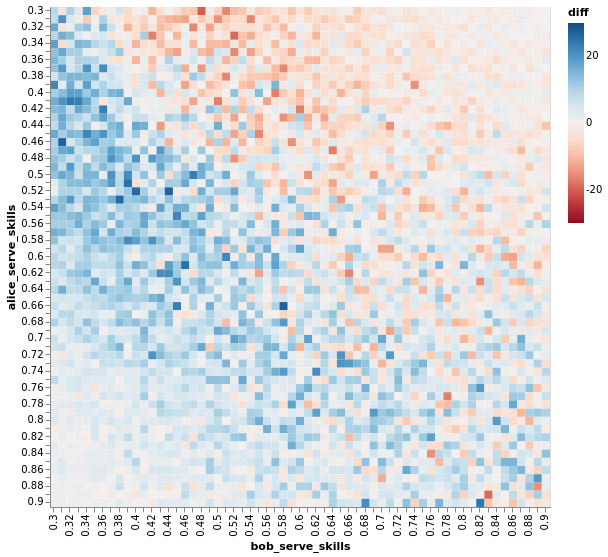

In [5]:
chart_diff #blue: better for alice to play game_b, red: better for alice to play game_a

In [6]:
alice_serve_skills = np.around(np.arange(0.3, 0.9, 0.01), 4)
alice_playing_skills = np.around(np.arange(0.3, 0.9, 0.01), 4)

scores_a = np.zeros((len(alice_serve_skills), len(alice_playing_skills)))
scores_b = np.zeros((len(alice_serve_skills), len(alice_playing_skills)))

for i, ask in enumerate(tqdm(alice_serve_skills)):
    for j, apk in enumerate(alice_playing_skills):
        
        alice = Player(0, ask, apk)
        bob = Player(1, 0.7, 0.7)
        
        match_a = [a_game(alice, bob) for i in range(100)]
        match_b = [b_game(alice, bob) for i in range(100)]
        
        scores_a[i][j] = sum(match_a)
        scores_b[i][j] = sum(match_b)


100%|██████████| 61/61 [01:17<00:00,  1.27s/it]


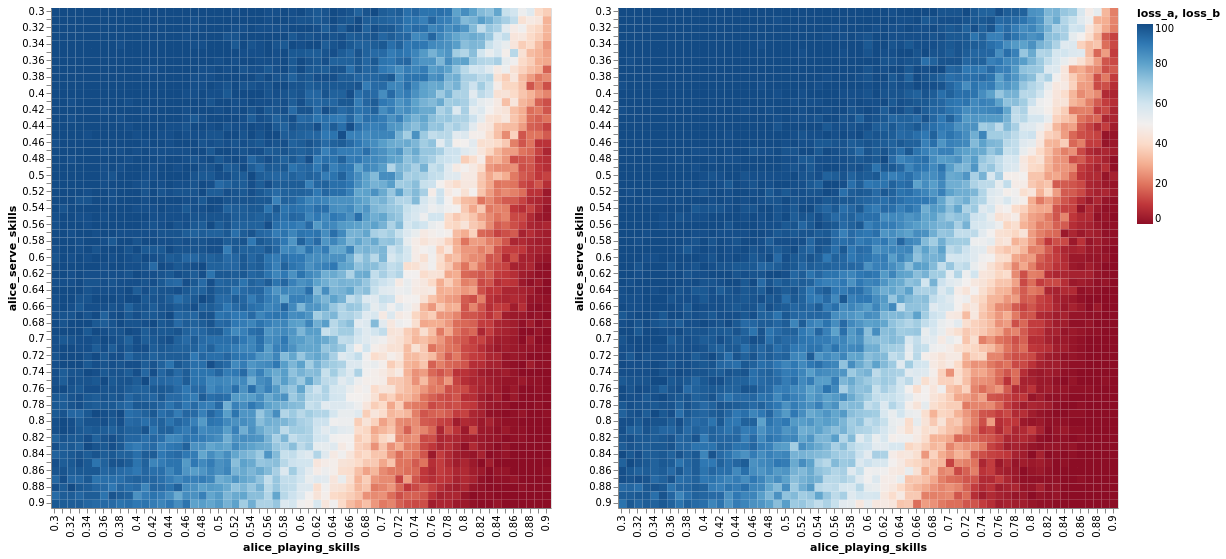

In [7]:
x, y = np.meshgrid(alice_serve_skills, alice_playing_skills)

source = pd.DataFrame({'alice_playing_skills': x.ravel(),
                     'alice_serve_skills': y.ravel(),
                     'loss_a': scores_a.ravel(),
                     'loss_b': scores_b.ravel(),
                     'diff': (scores_a - scores_b).ravel()})

base = alt.Chart(source).mark_rect().encode(
    x='alice_playing_skills:O',
    y='alice_serve_skills:O',
).properties(
    width=500,
    height=500
)

chart_a = base.encode(color=alt.Color('loss_a:Q', scale=alt.Scale(scheme='redblue')))# + base.mark_text(baseline='middle').encode(text='loss_a:Q', color=alt.value('black'))
chart_b = base.encode(color=alt.Color('loss_b:Q', scale=alt.Scale(scheme='redblue')))# + base.mark_text(baseline='middle').encode(text='loss_b:Q', color=alt.value('black'))
chart_diff = base.encode(color=alt.Color('diff:Q', scale=alt.Scale(scheme='redblue', domain=[-30, 30])))# + base.mark_text(baseline='middle').encode(text='diff:Q', color=alt.value('black'))

(chart_a | chart_b)

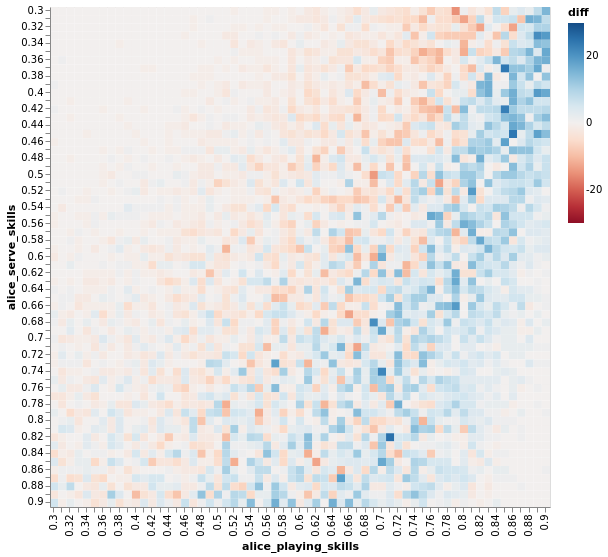

In [8]:
chart_diff